# <u><center>Step 1 - Prepare the data<center></u>
<br>

### 1a) Load the preorder_data.csv into a pandas dataframe (40,704 rows)

In [122]:
import pandas # for manipulating data
pandas.set_option('display.max_rows', 8) # just a style change, changing the default number of rows shown to 8

df = pandas.read_csv('preorder_data.csv') #df is our dataframe that contains all preorder data
df

,date,title,release_date,platform,subsidiary,account,distributor,units_sold,weeks_before_launch,preorder_status
0,2023-05-27,Windstorm: An Unexpected Arrival,2023-12-31,PS4,US,Target.com,U&I,15.0,32,Current
1,2023-05-27,Tintin Reporter: Cigars of the Pharaoh - Limit...,2023-12-31,Nintendo Switch,UK/EU,Amazon UK,NaN,17.0,32,Current
2,2023-05-06,Tintin Reporter: Cigars of the Pharaoh - Limit...,2023-12-31,Nintendo Switch,UK/EU,Argos Online,Centresoft,16.0,35,Current
3,2023-05-13,Tintin Reporter: Cigars of the Pharaoh - Limit...,2023-12-31,Nintendo Switch,UK/EU,Argos Online,Centresoft,15.0,34,Current
...,...,...,...,...,...,...,...,...,...,...
40700,2021-01-09,Five Nights at Freddy's: Core Collection,2021-01-12,Nintendo Switch,UK/EU,Argos,Centresoft,15.0,1,Current
40701,2021-01-09,Five Nights at Freddy's: Core Collection,2021-01-12,Nintendo Switch,UK/EU,Amazon UK,NaN,82.0,1,Current
40702,2021-01-02,Five Nights at Freddy's: Core Collection,2021-01-12,Nintendo Switch,UK/EU,Amazon UK,NaN,78.0,2,Current
40703,2021-01-09,Five Nights at Freddy's: Core Collection,2021-01-12,Nintendo Switch,UK/EU,NaN,Just for Games,104.0,1,Current


### 1b)  Select only the rows where the title is "Atlas Fallen" (668 rows)


In [80]:
af = df[df['title']=='Atlas Fallen'] #af is our dataframe that contains only data about Atlas Fallen
af

,date,title,release_date,platform,subsidiary,account,distributor,units_sold,weeks_before_launch,preorder_status
3210,2023-04-29,Atlas Fallen,2023-08-10,XSX,UK/EU,Smyths Toys,NaN,15.0,15,Current
3211,2023-04-22,Atlas Fallen,2023-08-10,XSX,UK/EU,Smyths Toys,NaN,15.0,16,Current
3212,2023-04-15,Atlas Fallen,2023-08-10,XSX,UK/EU,Smyths Toys,NaN,15.0,17,Current
3213,2023-04-08,Atlas Fallen,2023-08-10,XSX,UK/EU,Smyths Toys,NaN,15.0,18,Current
...,...,...,...,...,...,...,...,...,...,...
3874,2022-12-03,Atlas Fallen,2023-08-10,PS5,US,GameStop,U&I,20.0,36,Current
3875,2022-11-26,Atlas Fallen,2023-08-10,PS5,US,GameStop,U&I,28.0,37,Current
3876,2023-03-18,Atlas Fallen,2023-08-10,PS5,US,Target.com,U&I,16.0,21,Current
3877,2023-02-11,Atlas Fallen,2023-08-10,PS5,US,Target.com,U&I,30.0,26,Current


##### Quickly, I notice that despite there being 668 distinct orders for Atlas Fallen, there are only 41 distinct dates on which the orders are placed.

In [81]:
print('The number of unique preorders for "Atlas Fallen": {}'.format(len(af))) #length of the af dataframe
print('The number of unique dates on which "Atlas Fallen" was preordered: {}'.format(len(set(af['date']))))

# Python sets do not track duplicates. Turning a list into a set and taking the length of that set is a 
# quick way to count how many unique values there are in a list. 

The number of unique preorders for "Atlas Fallen": 668
The number of unique dates on which "Atlas Fallen" was preordered: 41


##### This is important to know for graphing. Rather than having to graph the sales for every date between August 2022 and June 2023, I now only have to graph 41 dates. 

##### "weeks_before_launch" is a better value to use for graphing than "date", due to the fact that it conveys an inherent meaning in relation to the business problem.
    If we are to graph using "date", the x axis tells us very little. But if we graph using "weeks_before_launch", then the x axis tells us how close we are getting to the release date of Atlas Fallen.

<br>
<br>

# <u><center>Step 2 - Graph the data<center></u>

1. The x-axis will be 'weeks_before_launch'.

2. The y-axis will be the cumulative sales for each week before launch.
    
<br>

### 2a) Compute the total units sold for Atlas Fallen during each week before launch

In [106]:
# Group the af dataframe by 'weeks_before_launch' and sum the number of units sold during each week.

# 'groupby' in Pandas works similarly to 'group by' in SQL, or pivot tables in Excel.
af1 = af.groupby(['weeks_before_launch'])['units_sold'].sum() 
af1

weeks_before_launch
10    276.0
11    455.0
12    385.0
13    438.0
      ...  
47    344.0
48    282.0
49    227.0
50    204.0
Name: units_sold, Length: 41, dtype: float64

### 2b) Graph the total units of "Atlas Fallen" preordered during each week leading up to release

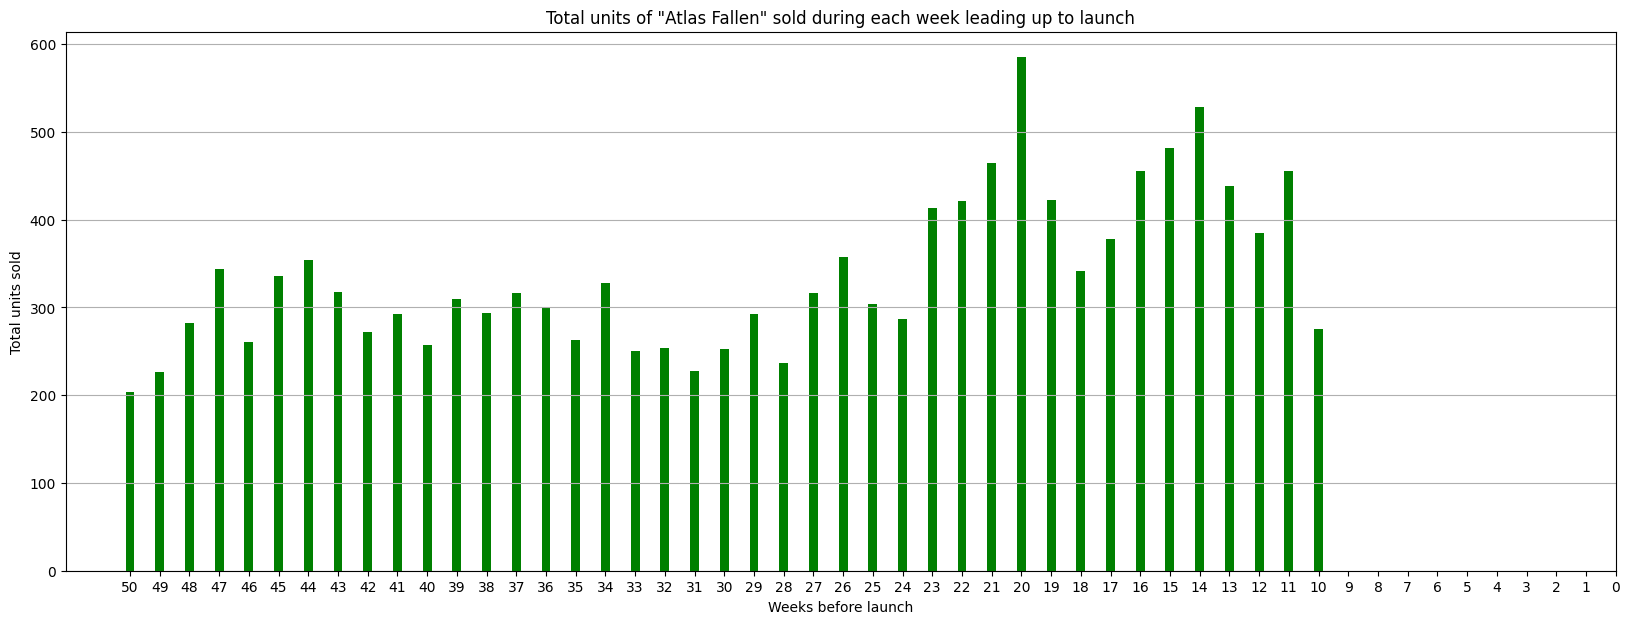

In [83]:
from matplotlib import pyplot as plt # for graphing

fig = plt.figure(figsize = (20, 7)) # adjusts how much space the figure takes up on the screen
plt.bar(af1.index, af1.values, color ='green',
        width = 0.30) # defines the plot as a barchart and specifies which data to use for x and y

plt.gca().invert_xaxis() # I invert the axis here in order to portray the graph as a progression of time.
plt.xticks(range(0,51)) 
plt.grid(axis='y') # adds gridlines in the y direction

plt.xlabel('Weeks before launch')
plt.ylabel('Total units sold')
plt.title('Total units of "Atlas Fallen" sold during each week leading up to launch')

plt.show()

### 2c) Make note of any observations you have made from this graph
1. As the release date grows closer, the number of preorder sales grows larger. There is an upwards trend.
2. At 10 weeks before launch, the upwards trend breaks. But this is because the sales for 10 weeks before launch are not complete. We are currently in week 10.

<br>
<br>

# <u><center>Step 3 - Forecasting using Linear Regression<center></u>
    
We can use linear regression to predict what the sales for the upcoming weeks will be.
    
<br>

### 3a) Create your Linear Regression model using Scikit-Learn, and find the y-intercept / slope

In [103]:
from sklearn.linear_model import LinearRegression

X = af1.index # weeks_before_launch
Y = af1.values # total number of units sold that week

X = [[x] for x in X] # sklearn models need inputs as 2D arrays, so we are reformatting the inputs
Y = [[x] for x in Y]

model = LinearRegression()
model.fit(X, Y)

# Remember, all regression lines are of the form 'y = mx+b'
y_int = model.intercept_[0] 
slope = model.coef_[0][0]

print("The Y INTERCEPT of the regression line is {}".format(y_int))
print("The SLOPE of the regression line is {}".format(slope))

The Y INTERCEPT of the regression line is 477.4668989547039
The SLOPE of the regression line is -4.706620209059235


### 3b) Using your newly found y intercept / slope, overlay the previous graph with the regression line

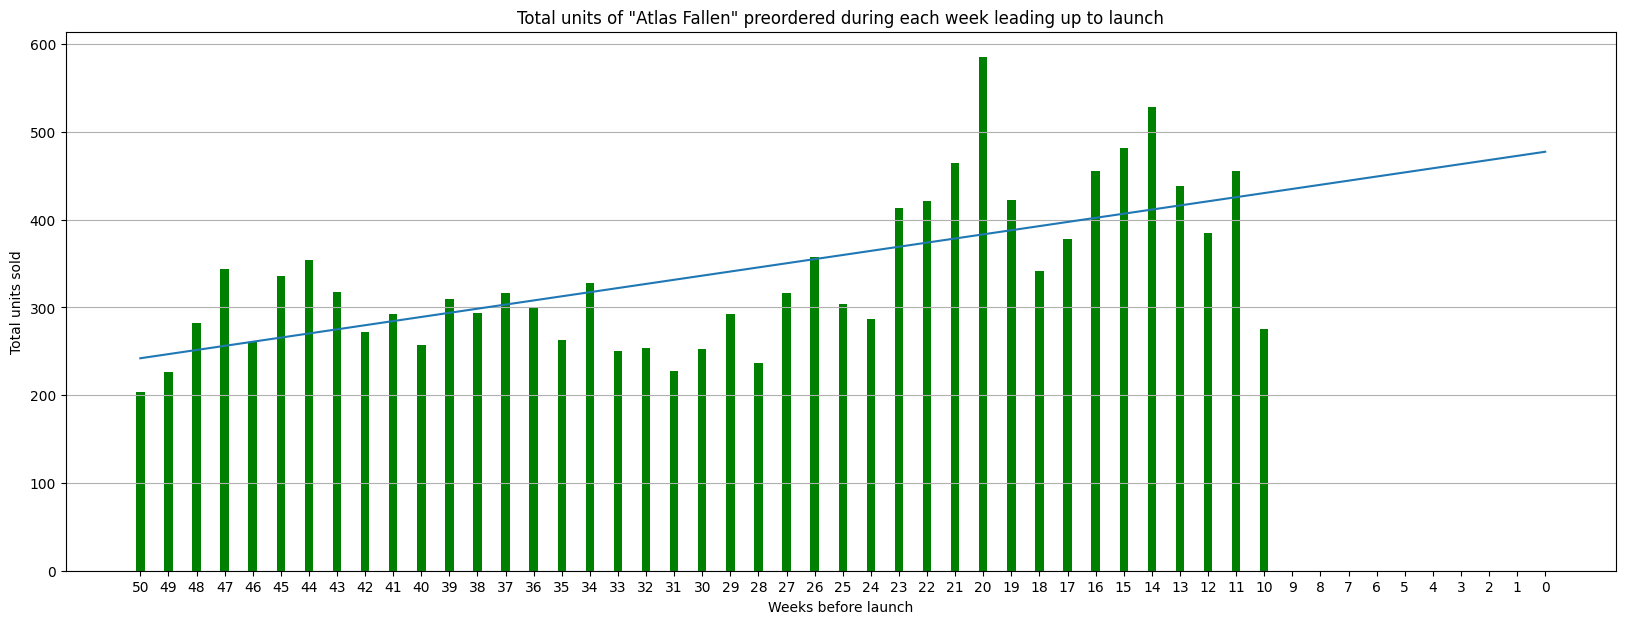

In [125]:
# This code is copied from the previous graph. I have simply overlaid the regression line. 

fig = plt.figure(figsize = (20, 7)) 
plt.bar(af1.index, af1.values, color ='green',
        width = 0.30) 

plt.gca().invert_xaxis() 
plt.xticks(range(0,51)) 
plt.grid(axis='y') 

plt.xlabel('Weeks before launch')
plt.ylabel('Total units sold')
plt.title('Total units of "Atlas Fallen" preordered during each week leading up to launch')

# This is the part where I plug in the y intercept & slope to draw a simple regression line. 
x = range(51)
y = [slope*x + y_int for x in x] # y = m*x + b 
plt.plot(x,y)

plt.show()

### 3c) Compute the values of future weeks using your regression line

In [129]:
predictive_sum = 0 # This is a counter variable to hold the sum of all the weeks that we had to predict. 
for i in range(9,0,-1):
    print('During the {}th week before launch, {} copies of Atlas Fallen are expected to be preordered.'.format(i,y[i]))
    predictive_sum += y[i]

# Predictive_sum will be used in 4b, so hold on tight


During the 9th week before launch, 435.10731707317075 copies of Atlas Fallen are expected to be preordered.
During the 8th week before launch, 439.81393728223 copies of Atlas Fallen are expected to be preordered.
During the 7th week before launch, 444.52055749128925 copies of Atlas Fallen are expected to be preordered.
During the 6th week before launch, 449.2271777003485 copies of Atlas Fallen are expected to be preordered.
During the 5th week before launch, 453.9337979094077 copies of Atlas Fallen are expected to be preordered.
During the 4th week before launch, 458.6404181184669 copies of Atlas Fallen are expected to be preordered.
During the 3th week before launch, 463.34703832752615 copies of Atlas Fallen are expected to be preordered.
During the 2th week before launch, 468.05365853658543 copies of Atlas Fallen are expected to be preordered.
During the 1th week before launch, 472.76027874564465 copies of Atlas Fallen are expected to be preordered.


<br>

# <u>Step 4 - Calculate the total number of preorders expected for Atlas Fallen</u>

### 4a) Calculate the CURRENT number of preorders

In [136]:
# We computed a dataframe called 'af' that contains all the presale orders for Atlas Fallen
# The column 'units_sold' tells us how many units of Atlas Fallen were sold in each presale order.
# Taking the sum of this column should tell us how many units of Atlas Fallen have been preordered up till now. 

af['units_sold'].sum()

13787.0

##### Currently, 13,787 copies of Atlas fallen have been preordered.

### 4b) Calculate the EXPECTED number of  preorders

In [138]:
# Currently, Atlas Fallen is 10 weeks away from launch.
# The number of preorders for Week 9 and onwards can be predicted using the Linear Regression model that we created. 
# In part 3c, we calculated the expected number of preorders for week 9 onwards and summed them up into a variable called predictive_sum.

predictive_sum

4085.404181184669

##### We expect 4,085 copies of Atlas Fallen to be preordered from now until launch.

### 4c) Add the two figures together to acquire the total number of preorders expected for Atlas Fallen

In [143]:
result = af['units_sold'].sum() + predictive_sum
int(result) # round to a whole number. Can't sell half a game.

17872

# Final Answer : 17,872 copies of Atlas Fallen are expected to be preordered